<a href="https://colab.research.google.com/github/ahdarin/data-science-sandbox/blob/main/eksplorasi_data_sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Data Sensor**

Notebook ini berisi proses eksplorasi dan analisis data sensor yang diperoleh dari beberapa node dari lokasi yang berbeda. Data ini mencakup pengukuran suhu dan kelembaban pada timestamp tertentu.

###Menyiapkan Data

Pertama, tambahkan library yang dibutuhkan untuk melakukan eksplorasi dan analisis data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Pada bagian ini, data dari berbagai node sensor diimpor ke dalam notebook untuk dianalisis lebih lanjut.

In [2]:
data_501 = pd.read_csv('/content/Data Sensor/Node_501.csv')
data_502 = pd.read_csv('/content/Data Sensor/Node_502.csv')
data_505 = pd.read_csv('/content/Data Sensor/Node_505.csv')
data_507 = pd.read_csv('/content/Data Sensor/Node_507.csv')
data_508 = pd.read_csv('/content/Data Sensor/Node_508.csv')

Setiap dataset ditambahkan kolom baru berupa `node_id`. Kolom ini berguna untuk memisahkan masing-masing node karena nantinya seluruh node akan dijadikan satu dataset.

In [3]:
data_501['node_id'] = 501
data_502['node_id'] = 502
data_505['node_id'] = 505
data_507['node_id'] = 507
data_508['node_id'] = 508

Selanjutnya seluruh data akan digabungkan untuk memudahkan dalam melakukan analisis.

In [4]:
all_data = pd.concat([data_501, data_502, data_505, data_507, data_508], ignore_index=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6583 entries, 0 to 6582
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           6583 non-null   int64  
 1   timestamp    6583 non-null   object 
 2   temperature  6345 non-null   float64
 3   humidity     6321 non-null   float64
 4   node_id      6583 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 257.3+ KB


Kolom `timestamp` yang masih memiliki tipe data `object` diubah menjadi tipe data `datetime`. Selanjutnya, data diurutkan berdasarkan waktu pada `timestamp`.

In [5]:
all_data['timestamp'] = pd.to_datetime(all_data['timestamp'], format='%d/%m/%Y %H:%M')
all_data = all_data.sort_values(by=['timestamp','ID'])
all_data

,ID,timestamp,temperature,humidity,node_id
1367,1368,2014-12-09 00:01:00,23.54,30.63,502
2621,2622,2014-12-09 00:01:00,23.87,36.15,505
3989,3990,2014-12-09 00:01:00,23.22,36.15,507
5352,5353,2014-12-09 00:01:00,23.54,36.31,508
0,1,2014-12-09 00:03:00,25.16,36.47,501
...,...,...,...,...,...
6582,6583,2015-01-09 06:24:00,16.12,53.18,508
3988,3989,2015-01-09 06:27:00,16.77,65.32,505
5351,5352,2015-01-09 06:30:00,15.80,59.48,507
1366,1367,2015-01-09 06:32:00,15.80,58.85,501


In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6583 entries, 1367 to 2620
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           6583 non-null   int64         
 1   timestamp    6583 non-null   datetime64[ns]
 2   temperature  6345 non-null   float64       
 3   humidity     6321 non-null   float64       
 4   node_id      6583 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 308.6 KB


###Handling Missing Values

Dapat dilihat pada kolom `temperature` dan `humidity` masih terdapat data bernilai NaN atau `null`. Data-data ini disebut ***Missing Values***. Missing Values ini perlu ditangani, bisa dengan mengisi dengan modus, rata-rata, atau barisnya dihapus saja.

In [7]:
all_data.isnull().sum()

,0
ID,0
timestamp,0
temperature,238
humidity,262
node_id,0


Kolom `ID` akan dihapus karena tidak akan dipakai lagi pada saat dilakukan analisis. selanjutnya baris-baris dengan Missing Value dihapus dengan fungsi `.dropna()`. Dapat dilihat tidak ada lagi data bernilai `null`.

In [8]:
all_data = all_data.drop('ID', axis=1)
all_data = all_data.dropna()
all_data.isnull().sum()

,0
timestamp,0
temperature,0
humidity,0
node_id,0


###Resampling Data

Visualisasi data perubahan suhu dan kelembaban dengan bentuk plot berdasarkan waktu dan node_id nya.

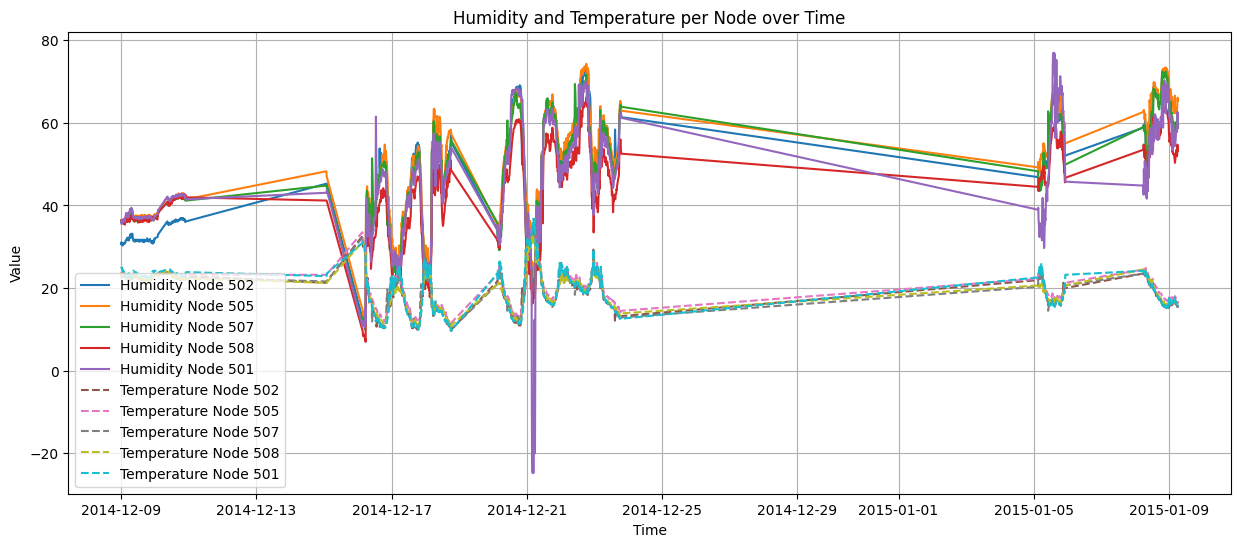

In [9]:
# Membuat plot untuk setiap node_id
nodes = all_data['node_id'].unique()

# Membuat plot garis
plt.figure(figsize=(15, 6))

# Plot humidity
for node in nodes:
    node_data = all_data[all_data['node_id'] == node]
    plt.plot(node_data['timestamp'], node_data['humidity'], label=f'Humidity Node {node}', linestyle='-')

# Plot temperature
for node in nodes:
    node_data = all_data[all_data['node_id'] == node]
    plt.plot(node_data['timestamp'], node_data['temperature'], label=f'Temperature Node {node}', linestyle='--')

# Menambahkan judul dan label
plt.title('Humidity and Temperature per Node over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Tampilkan plot
plt.grid(True)
plt.show()

Dari visualisasi, data berdasarkan *timestamp* masih terlihat kacau. Masalahnya diantaranya:
1. *Timestamp* yang terlalu dekat jaraknya (per 10 menit);
2. *Timestamp* yang terlalu panjang antara awal dan akhir;
3. Terdapat waktu kosong tanpa data.

Solusinya yang pertama adalah dengan mengubah jarak per waktunya yang sebelumnya per 10 menit menjadi per 30 menit. Untuk data tiap 30 menit tersebut dirata-ratakan dari yang sebelumnya.

In [10]:
# Misalkan all_data adalah DataFrame yang telah dimuat dan di-set index
all_data.set_index('timestamp', inplace=True)

# Resample berdasarkan waktu per 30 menit dan pisahkan berdasarkan node_id
df_resampled = all_data.groupby('node_id').resample('30Min').mean()

#setelah di-resample, kolom timestamp berubah menjadi index

# Reset index untuk mendapatkan kolom waktu kembali
df_resampled = df_resampled.drop('node_id', axis=1)
df_resampled = df_resampled.reset_index()

# Tampilkan hasil resampling
df_resampled

,node_id,timestamp,temperature,humidity
0,501,2014-12-09 00:00:00,24.940000,35.890000
1,501,2014-12-09 00:30:00,24.723333,35.993333
2,501,2014-12-09 01:00:00,24.190000,36.096667
3,501,2014-12-09 01:30:00,23.976667,36.360000
4,501,2014-12-09 02:00:00,23.870000,36.256667
...,...,...,...,...
7503,508,2015-01-09 04:00:00,16.930000,50.815000
7504,508,2015-01-09 04:30:00,16.876667,51.706667
7505,508,2015-01-09 05:00:00,16.610000,52.940000
7506,508,2015-01-09 05:30:00,16.450000,52.233333


Setelah di-resample akan banyak timbul baris kosong karena adanya waktu data sensor tidak dihitung. Baris-baris ini harus dihapus.

In [11]:
df_resampled.isnull().sum()

,0
node_id,0
timestamp,0
temperature,5156
humidity,5156


In [12]:
df_resampled = df_resampled.dropna()
print(df_resampled.isnull().sum())
print()
print(df_resampled.info())

node_id        0
timestamp      0
temperature    0
humidity       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 2352 entries, 0 to 7507
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   node_id      2352 non-null   int64         
 1   timestamp    2352 non-null   datetime64[ns]
 2   temperature  2352 non-null   float64       
 3   humidity     2352 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 91.9 KB
None


Selanjutnya, data-data dengan waktu yang terpisah jauh sebaiknya dihapus, agar data hanya memiliki waktu yang berdekatan.

In [13]:
# Pastikan 'timestamp' ada sebagai kolom
df_resampled['date'] = df_resampled['timestamp'].dt.date

# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah baris
jumlah_baris_per_hari = df_resampled.groupby('date').size()

# Menampilkan hasil
print(jumlah_baris_per_hari)

date
2014-12-09    240
2014-12-10    153
2014-12-15      6
2014-12-16    203
2014-12-17    235
2014-12-18    187
2014-12-20    208
2014-12-21    238
2014-12-22    239
2014-12-23    194
2015-01-05    199
2015-01-08    182
2015-01-09     68
dtype: int64


<ipython-input-13-5469b761edb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resampled['date'] = df_resampled['timestamp'].dt.date


Data yang akan dihapus adalah data yang memiliki timestamp pada 2014-12-09, 2014-12-10, 2014-12-15, dan data yang sudah masuk tahun 2015.




In [14]:
# Menggunakan boolean indexing untuk mendapatkan baris dengan tanggal tertentu
tanggal_dihapus1 = df_resampled[(df_resampled['timestamp'] >= '2014-12-09') & (df_resampled['timestamp'] <= '2014-12-16')]
tanggal_dihapus2 = df_resampled[df_resampled['timestamp'] >= '2015-01-05']

tanggal_dihapus = pd.concat([tanggal_dihapus1, tanggal_dihapus2])
tanggal_dihapus

,node_id,timestamp,temperature,humidity,date
0,501,2014-12-09 00:00:00,24.940000,35.890000,2014-12-09
1,501,2014-12-09 00:30:00,24.723333,35.993333,2014-12-09
2,501,2014-12-09 01:00:00,24.190000,36.096667,2014-12-09
3,501,2014-12-09 01:30:00,23.976667,36.360000,2014-12-09
4,501,2014-12-09 02:00:00,23.870000,36.256667,2014-12-09
...,...,...,...,...,...
7503,508,2015-01-09 04:00:00,16.930000,50.815000,2015-01-09
7504,508,2015-01-09 04:30:00,16.876667,51.706667,2015-01-09
7505,508,2015-01-09 05:00:00,16.610000,52.940000,2015-01-09
7506,508,2015-01-09 05:30:00,16.450000,52.233333,2015-01-09


In [15]:
df_resampled = df_resampled.drop(tanggal_dihapus.index)

In [16]:
# Mengelompokkan data berdasarkan tanggal dan menghitung jumlah baris
jumlah_baris_per_hari = df_resampled.groupby(df_resampled['timestamp'].dt.date).size()

# Menampilkan hasil
print(jumlah_baris_per_hari)

timestamp
2014-12-16    203
2014-12-17    235
2014-12-18    187
2014-12-20    208
2014-12-21    238
2014-12-22    239
2014-12-23    194
dtype: int64


Pada akhirnya, data yang tersisa hanya pada waktu yang berdekatan, yakni antara 2014-12-16 hingga 2014-12-23.

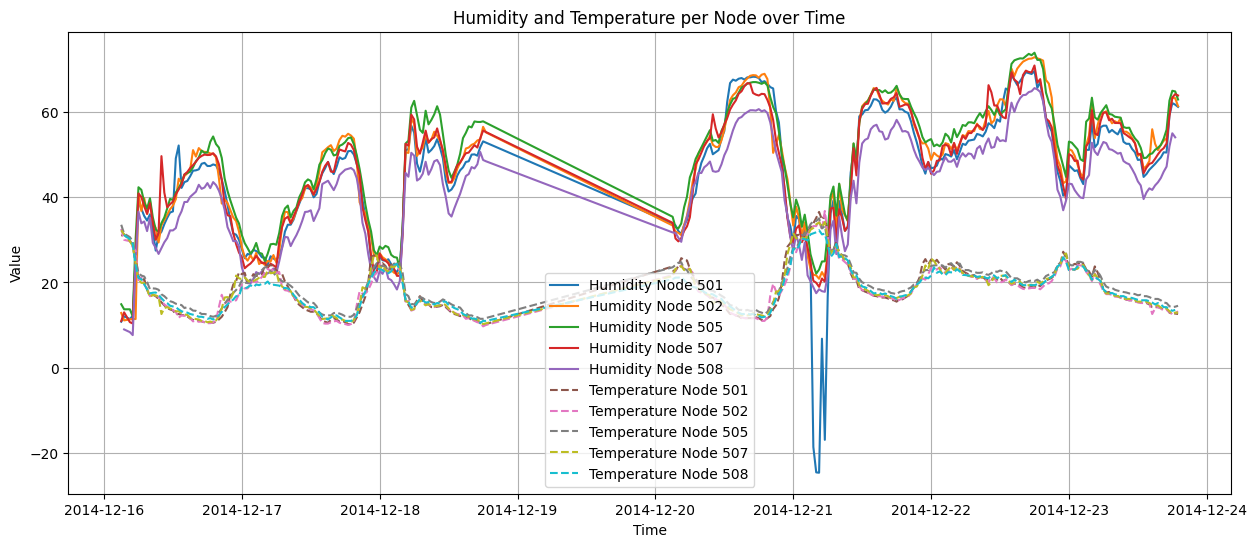

In [17]:
# Membuat plot untuk setiap node_id
nodes = df_resampled['node_id'].unique()

# Membuat plot garis
plt.figure(figsize=(15, 6))

# Plot humidity
for node in nodes:
    node_data = df_resampled[df_resampled['node_id'] == node]
    plt.plot(node_data['timestamp'], node_data['humidity'], label=f'Humidity Node {node}', linestyle='-')

# Plot temperature
for node in nodes:
    node_data = df_resampled[df_resampled['node_id'] == node]
    plt.plot(node_data['timestamp'], node_data['temperature'], label=f'Temperature Node {node}', linestyle='--')

# Menambahkan judul dan label
plt.title('Humidity and Temperature per Node over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Tampilkan plot
plt.grid(True)
plt.show()

Visualisasi yang dihasilkan setelah dilakukan *resample* menjadi lebih rapi dan mudah dibaca.

###Handling Outliers

> **Outliers** adalah data yang memiliki nilai jauh dari mayoritas atau pola umum dari dataset.

Hitung rata-rata, minimum, dan maksimum suhu dan kelembaban.



In [18]:
df_resampled[['temperature','humidity']].describe()

,temperature,humidity
count,1504.000000,1504.000000
mean,18.649305,46.477414
std,5.278010,13.797397
min,9.674667,-24.700000
25%,14.510000,36.780000
50%,18.166667,48.928667
75%,22.143333,55.967583
max,36.770000,73.947000


Visualisasi data dalam bentuk boxplot untuk melihat adanya outliers atau tidak

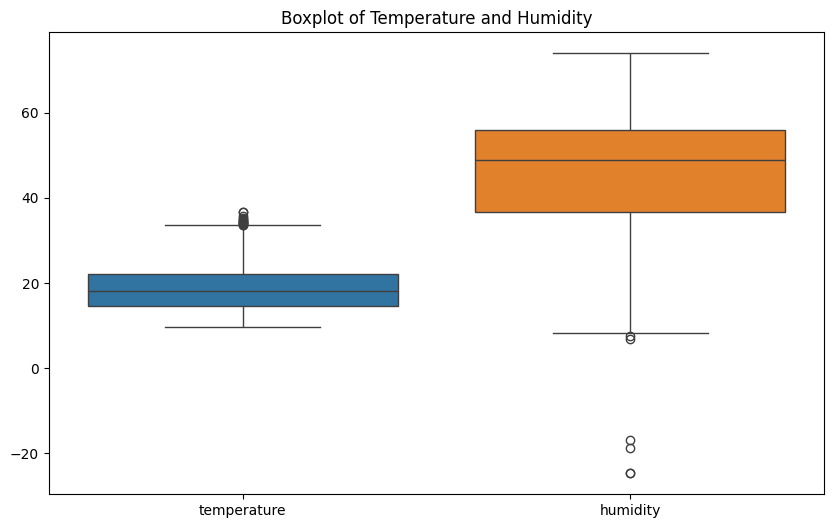

In [19]:
# Membuat figure untuk boxplot
plt.figure(figsize=(10, 6))

# Membuat boxplot untuk temperature dan humidity
sns.boxplot(data=df_resampled[['temperature', 'humidity']])

# Menambahkan judul
plt.title('Boxplot of Temperature and Humidity')

# Tampilkan plot
plt.show()

Melalui visualisasi boxplot, dapat dilihat terdapat beberapa outliers pada data kelembaban.

Untuk menanganinya, identifikasi outliers menggunakan IQR (Interquertile Range).

In [20]:
# Menghitung Q1 (25th percentile) dan Q3 (75th percentile)
Q1 = df_resampled[['temperature', 'humidity']].quantile(0.25)
Q3 = df_resampled[['temperature', 'humidity']].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi data yang bukan outlier
non_outliers = (df_resampled[['temperature', 'humidity']] >= lower_bound) & (df_resampled[['temperature', 'humidity']] <= upper_bound)

# Memfilter data yang bukan outlier
df_re_cleaned = df_resampled[non_outliers.all(axis=1)]

# Menampilkan data yang sudah dibersihkan dari outlier
print(df_re_cleaned)


      node_id           timestamp  temperature   humidity        date
342       501 2014-12-16 03:00:00    30.960000  10.770000  2014-12-16
343       501 2014-12-16 03:30:00    31.290000  12.030000  2014-12-16
345       501 2014-12-16 04:30:00    29.835000  11.400000  2014-12-16
346       501 2014-12-16 05:00:00    28.706667  12.133333  2014-12-16
347       501 2014-12-16 05:30:00    24.403333  25.796667  2014-12-16
...       ...                 ...          ...        ...         ...
6712      508 2014-12-23 16:30:00    14.190000  46.012000  2014-12-23
6713      508 2014-12-23 17:00:00    14.190000  47.197000  2014-12-23
6714      508 2014-12-23 17:30:00    13.650000  51.923667  2014-12-23
6715      508 2014-12-23 18:00:00    13.326667  55.023667  2014-12-23
6716      508 2014-12-23 18:30:00    13.543333  54.080333  2014-12-23

[1489 rows x 5 columns]


Lakukan visualisasi kembali.

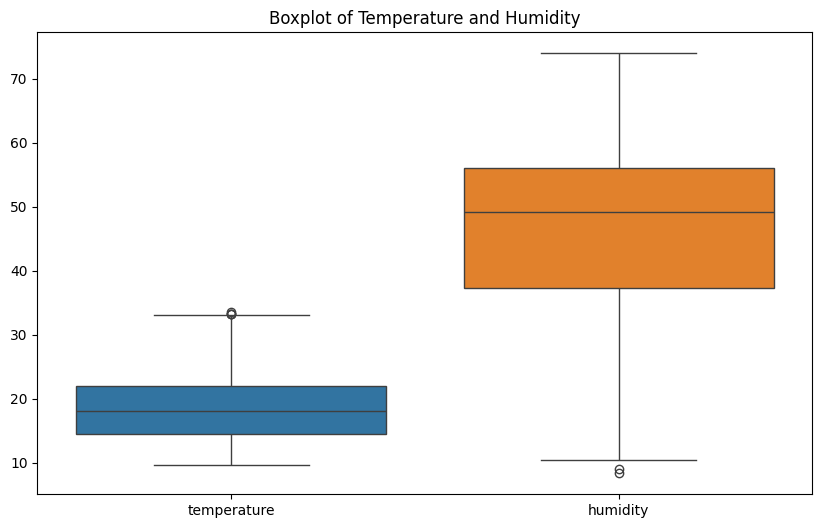

In [21]:
# Membuat figure untuk boxplot
plt.figure(figsize=(10, 6))

# Membuat boxplot untuk temperature dan humidity
sns.boxplot(data=df_re_cleaned[['temperature', 'humidity']])

# Menambahkan judul
plt.title('Boxplot of Temperature and Humidity')

# Tampilkan plot
plt.show()

In [22]:
df_re_cleaned[['temperature','humidity']].describe()

,temperature,humidity
count,1489.000000,1489.000000
mean,18.490742,46.860721
std,5.058277,13.191628
min,9.674667,8.325000
25%,14.510000,37.210333
50%,18.060000,49.075000
75%,21.930000,56.022000
max,33.540000,73.947000


Outliers akan hilang dan data akan menjadi lebih teratur dan mudah untuk dilakukan analisis.

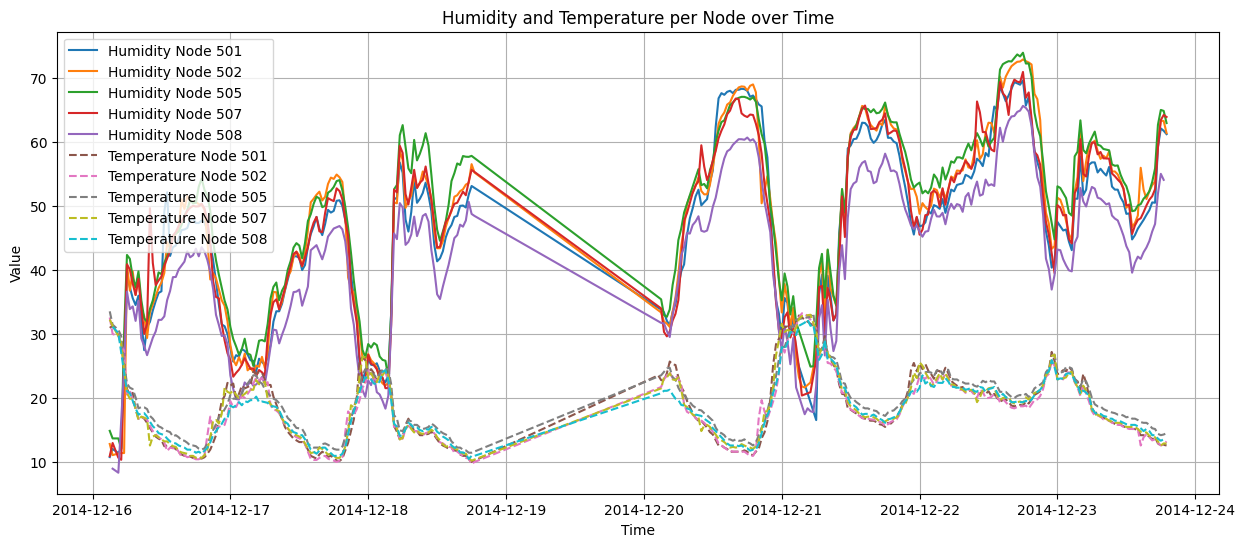

In [28]:
# Membuat plot untuk setiap node_id
nodes = df_re_cleaned['node_id'].unique()

# Membuat plot garis
plt.figure(figsize=(15, 6))

# Plot humidity
for node in nodes:
    node_data = df_re_cleaned[df_re_cleaned['node_id'] == node]
    plt.plot(node_data['timestamp'], node_data['humidity'], label=f'Humidity Node {node}', linestyle='-')

# Plot temperature
for node in nodes:
    node_data = df_re_cleaned[df_re_cleaned['node_id'] == node]
    plt.plot(node_data['timestamp'], node_data['temperature'], label=f'Temperature Node {node}', linestyle='--')

# Menambahkan judul dan label
plt.title('Humidity and Temperature per Node over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Tampilkan plot
plt.grid(True)
plt.show()

###Identifikasi Pola Musiman atau Tren

Untuk mengidentifikasi pola musiman atau tren dalam waktu tertentu, dapat dilakukan beberapa pendekatan analisis data.

1. **Plot Data Time Series**

Pendekatan ini memvisualisasikan data suhu dan kelembaban untuk melihat pola musiman atau tren. Visualisasi ini dapat membantu mengidentifikasi fluktuasi reguler (musiman) atau tren jangka panjang.

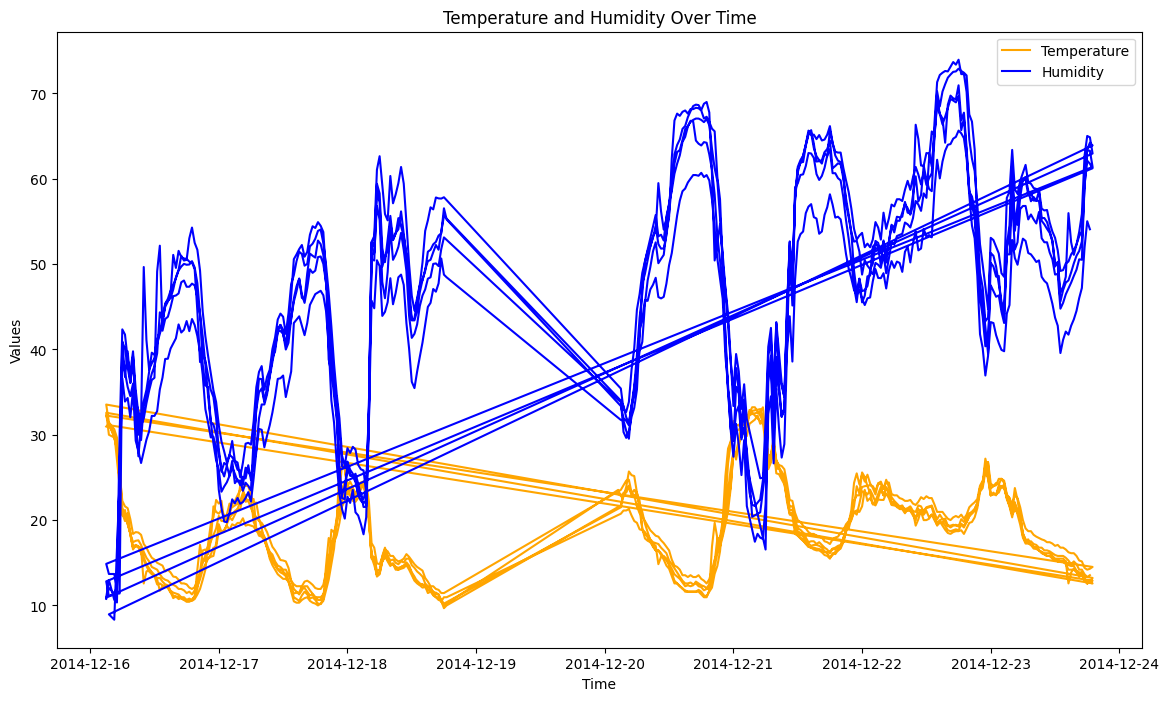

In [23]:
# Membuat plot untuk visualisasi tren waktu
plt.figure(figsize=(14, 8))

# Plot untuk suhu (temperature)
plt.plot(df_re_cleaned['timestamp'], df_re_cleaned['temperature'], label='Temperature', color='orange')

# Plot untuk kelembaban (humidity)
plt.plot(df_re_cleaned['timestamp'], df_re_cleaned['humidity'], label='Humidity', color='blue')

# Menambahkan label, judul, dan legenda
plt.title('Temperature and Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

# Tampilkan plot
plt.show()


2. **Moving Average**

Pendekatan menggunakan metode **moving average** dapat digunakan untuk menghaluskan data dan melihat tren jangka panjang. Ini akan membantu mengindentifikasi tren umum dalam data tanpa dipengaruhi oleh fluktuasi jangka pendek.

<ipython-input-24-b9c18b692de2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re_cleaned['temperature_MA'] = df_re_cleaned['temperature'].rolling(window=15).mean()
<ipython-input-24-b9c18b692de2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_re_cleaned['humidity_MA'] = df_re_cleaned['humidity'].rolling(window=15).mean()


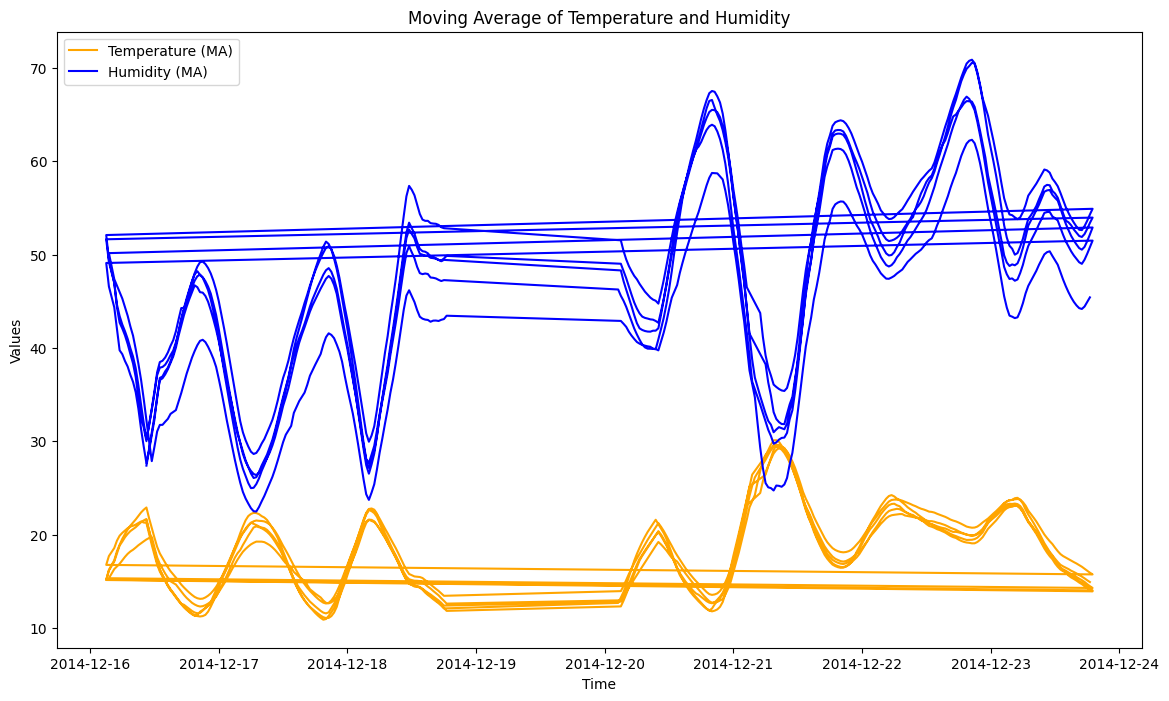

In [24]:
# Membuat kolom moving average untuk temperature dan humidity
df_re_cleaned['temperature_MA'] = df_re_cleaned['temperature'].rolling(window=15).mean()
df_re_cleaned['humidity_MA'] = df_re_cleaned['humidity'].rolling(window=15).mean()

# Visualisasi moving average
plt.figure(figsize=(14, 8))
plt.plot(df_re_cleaned['timestamp'], df_re_cleaned['temperature_MA'], label='Temperature (MA)', color='orange')
plt.plot(df_re_cleaned['timestamp'], df_re_cleaned['humidity_MA'], label='Humidity (MA)', color='blue')

plt.title('Moving Average of Temperature and Humidity')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


`rolling(window=15)`: menghitung moving average dengan jendela 15 titik data.

###Analisis Korelasi Antara Suhu dan Kelembaban

Menghitung Koefisien Korelasi

In [25]:
# Menghitung koefisien korelasi Pearson antara suhu dan kelembaban
correlation = all_data['temperature'].corr(all_data['humidity'])

print(f"Koefisien Korelasi antara Suhu dan Kelembaban: {correlation}")

Koefisien Korelasi antara Suhu dan Kelembaban: -0.5146238392981978


* Koefisien korelasi -0,51 berarti antara suhu dan kelembaban terdapat **hubungan negatif moderat**.

* Negatif berarti bahwa ketika suhu meningkat, kelembaban cenderung menurun, dan sebaliknya.

* 0,51 menunjukkan kekuatan korelasi berada di tingkat sedang. Semakin mendekati -1, semakin kuat hubungan negatif tersebut.

1. Visualisasi korelasi dengan **Heatmap**

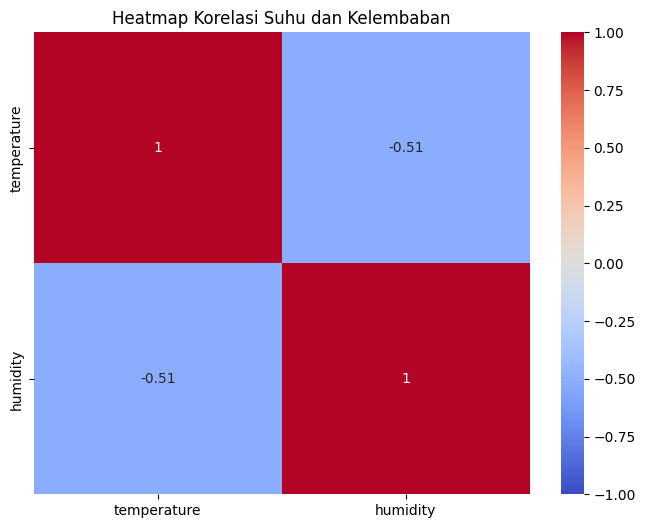

In [26]:
# Membuat matriks korelasi untuk seluruh dataset
corr_matrix = all_data[['temperature', 'humidity']].corr()

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Suhu dan Kelembaban')
plt.show()


2. Visualisasi korelasi menggunakan **Scatter Plot**

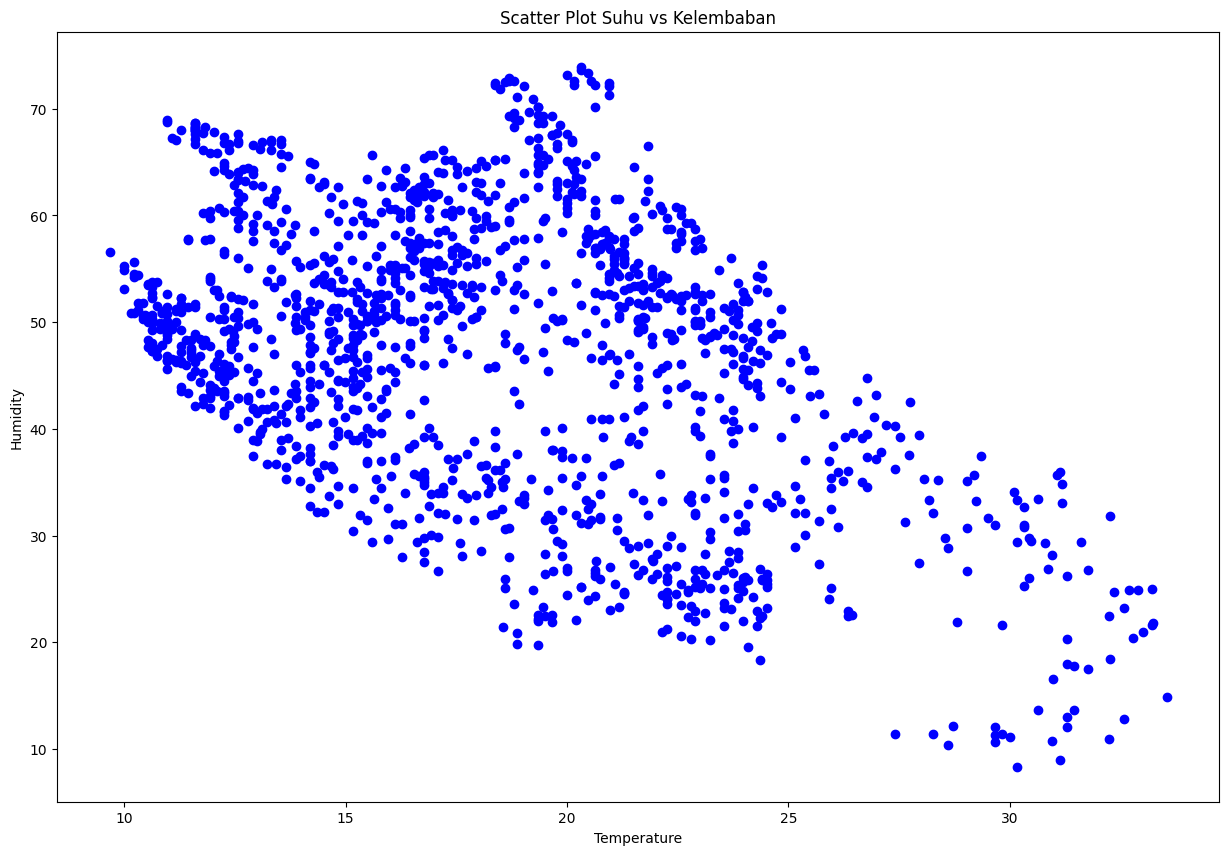

In [27]:
# Membuat scatter plot untuk suhu dan kelembaban
plt.figure(figsize=(15,10))
plt.scatter(df_re_cleaned['temperature'], df_re_cleaned['humidity'], color='blue')
plt.title('Scatter Plot Suhu vs Kelembaban')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()